Importing Necessary Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the data
data = pd.read_csv("/content/only_road_accidents_data_month2.csv")

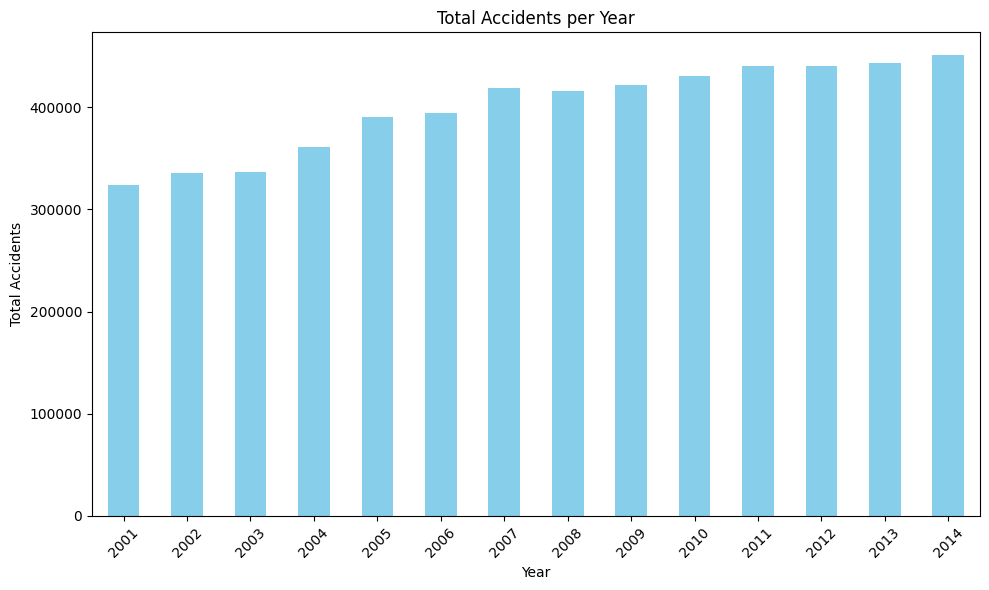


A & N Islands: Total Accidents - 2893


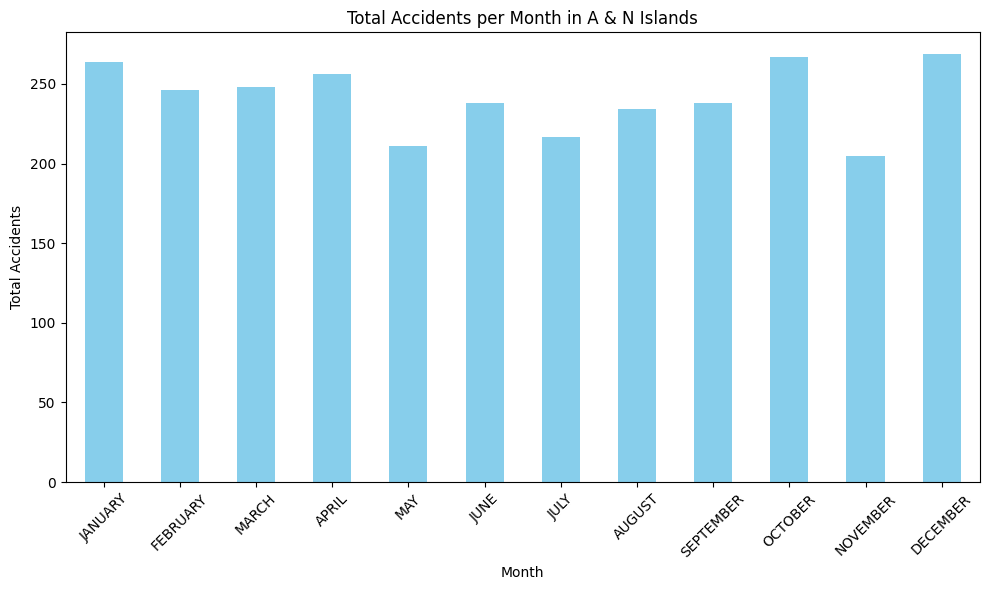

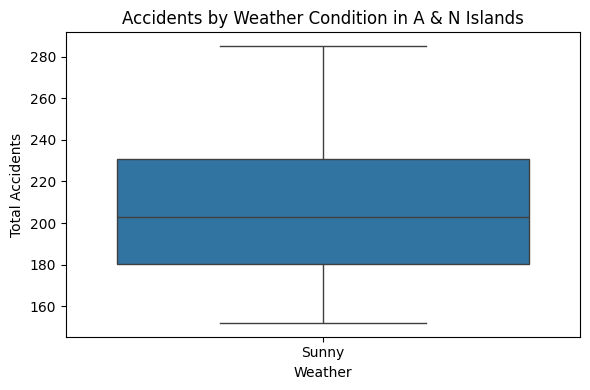


Andhra Pradesh: Total Accidents - 546821


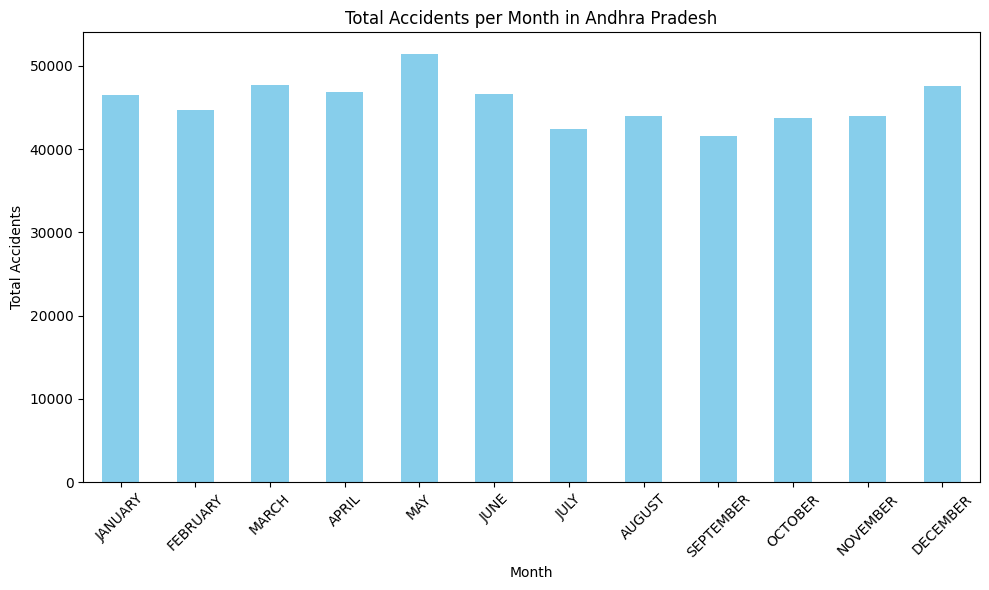

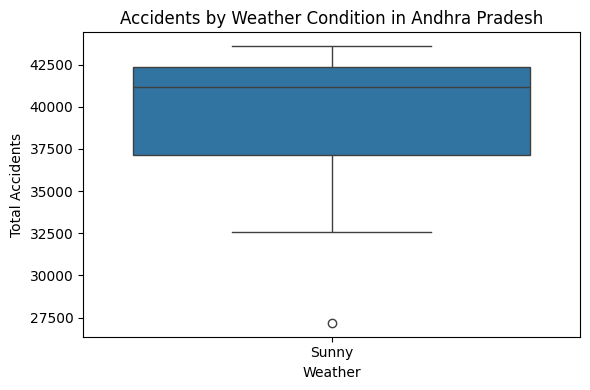


Arunachal Pradesh: Total Accidents - 3389


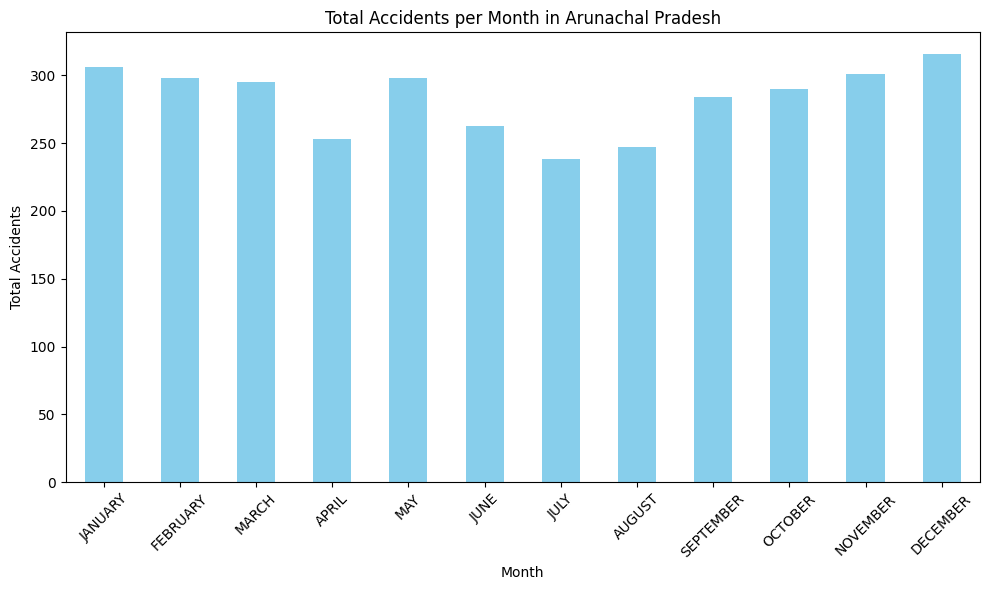

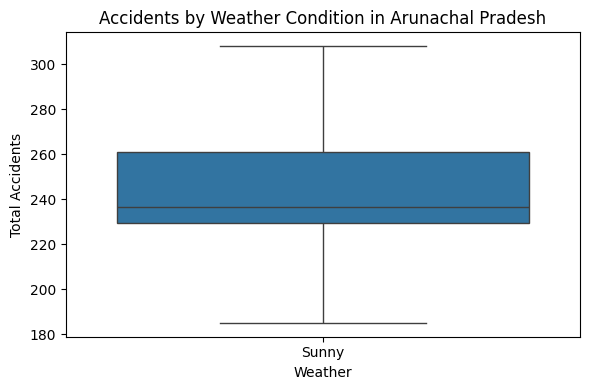


Assam: Total Accidents - 61718


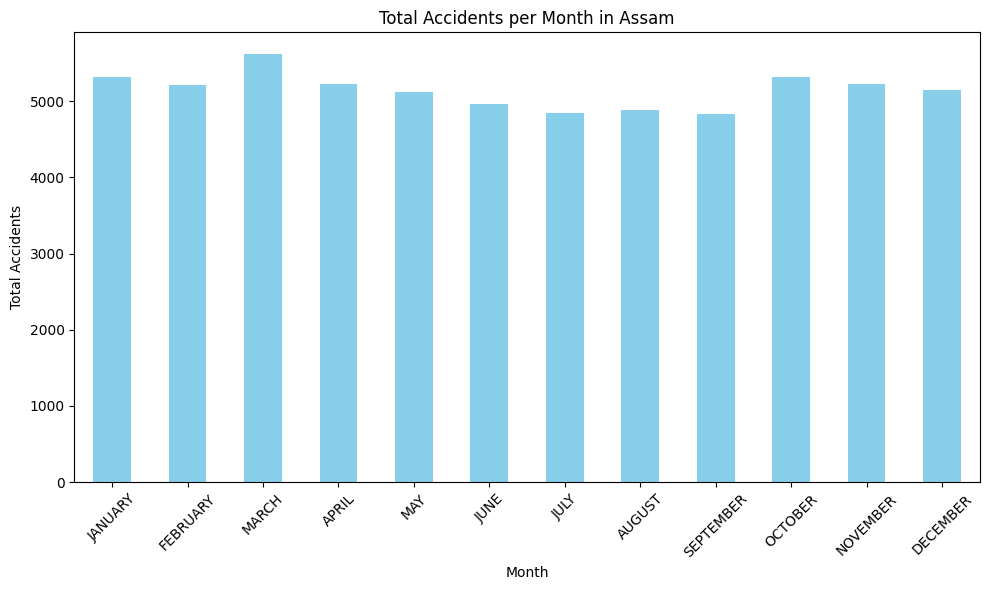

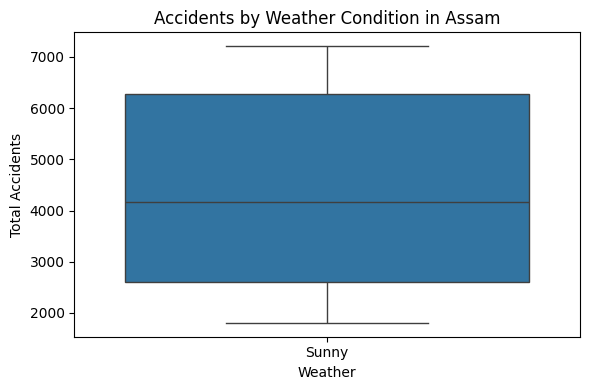


Bihar: Total Accidents - 92648


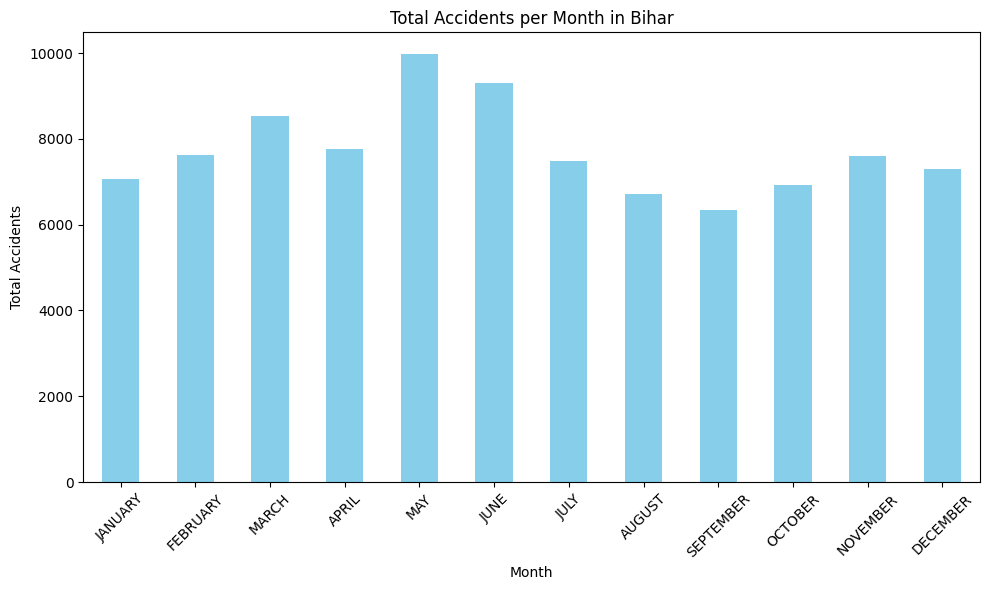

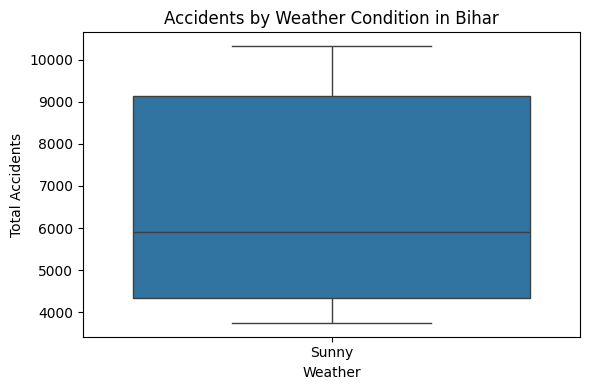


Chandigarh: Total Accidents - 6411


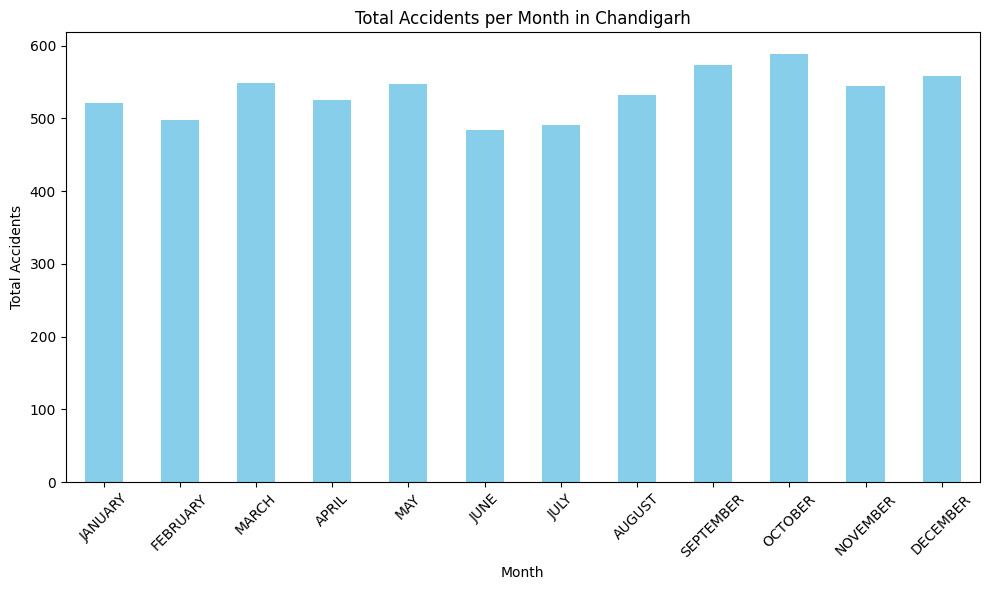

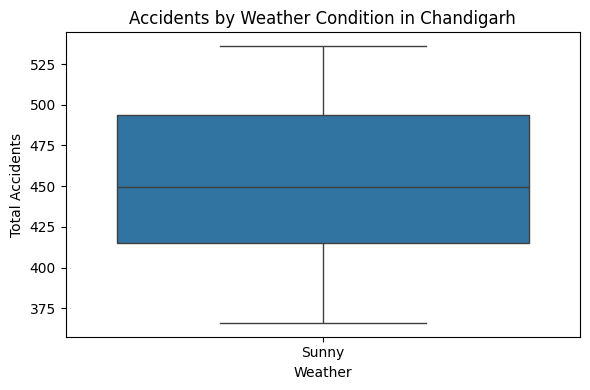


Chhattisgarh: Total Accidents - 117817


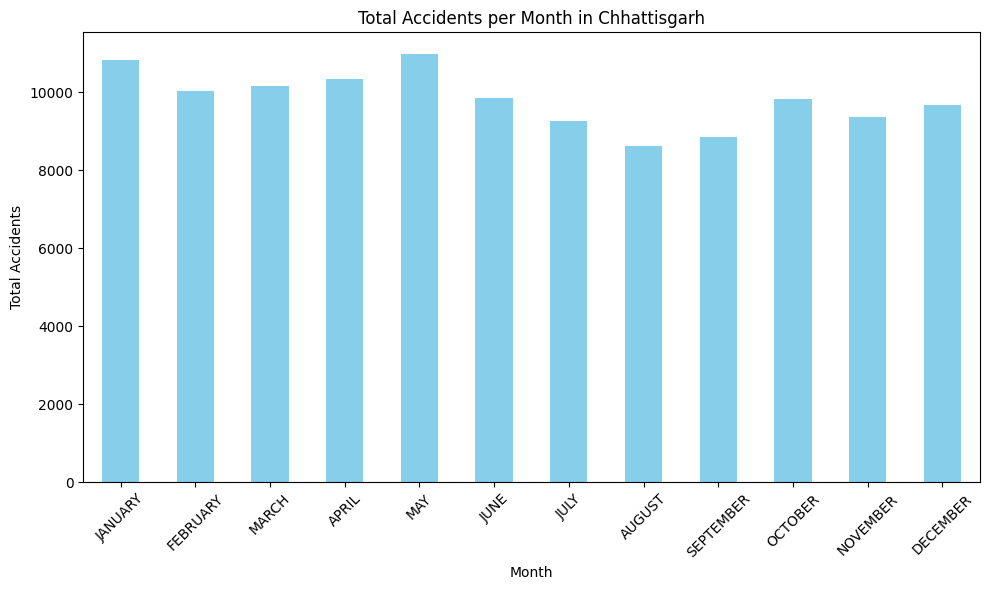

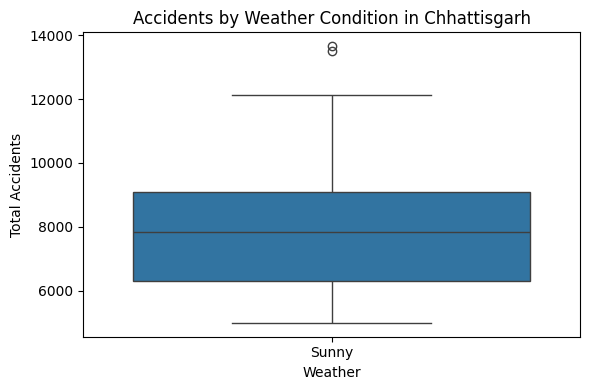


D & N Haveli: Total Accidents - 1216


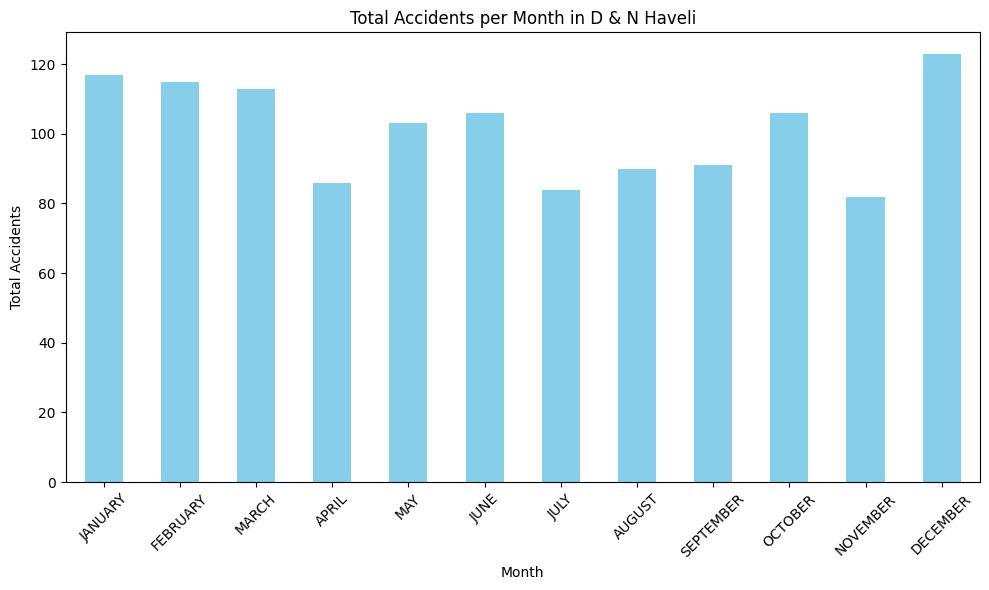

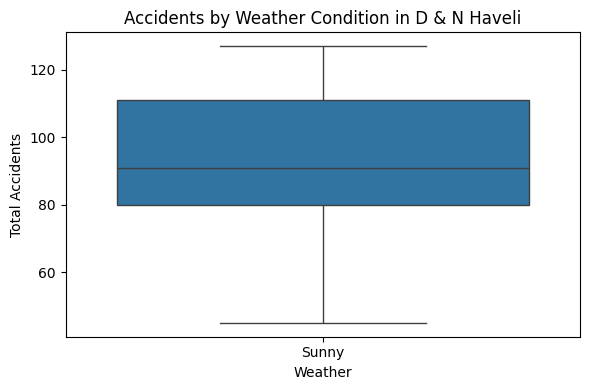


D&N Haveli: Total Accidents - 87


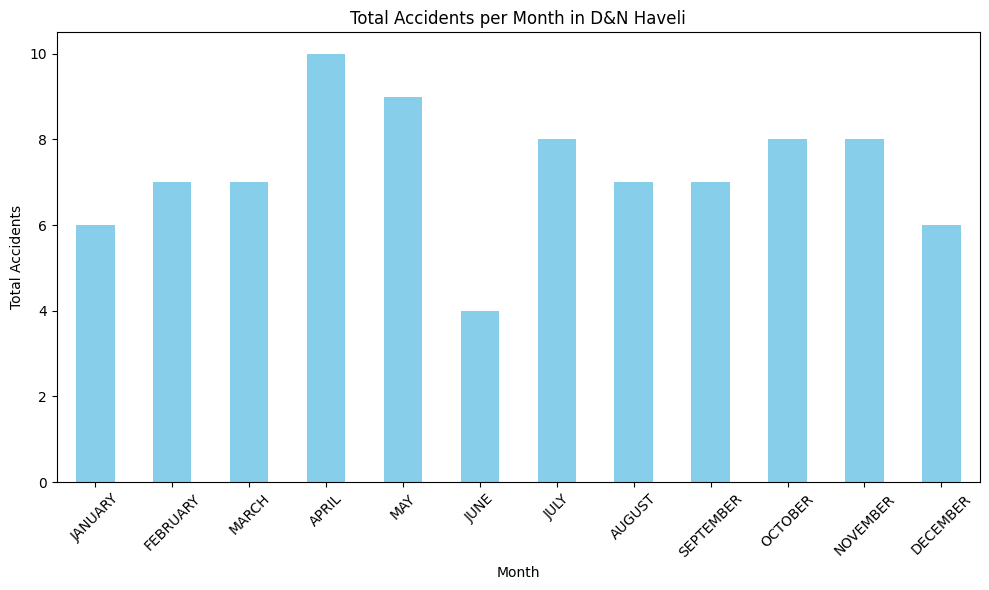

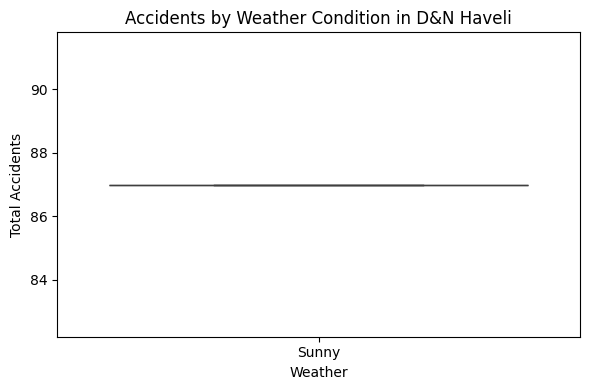


Daman & Diu: Total Accidents - 643


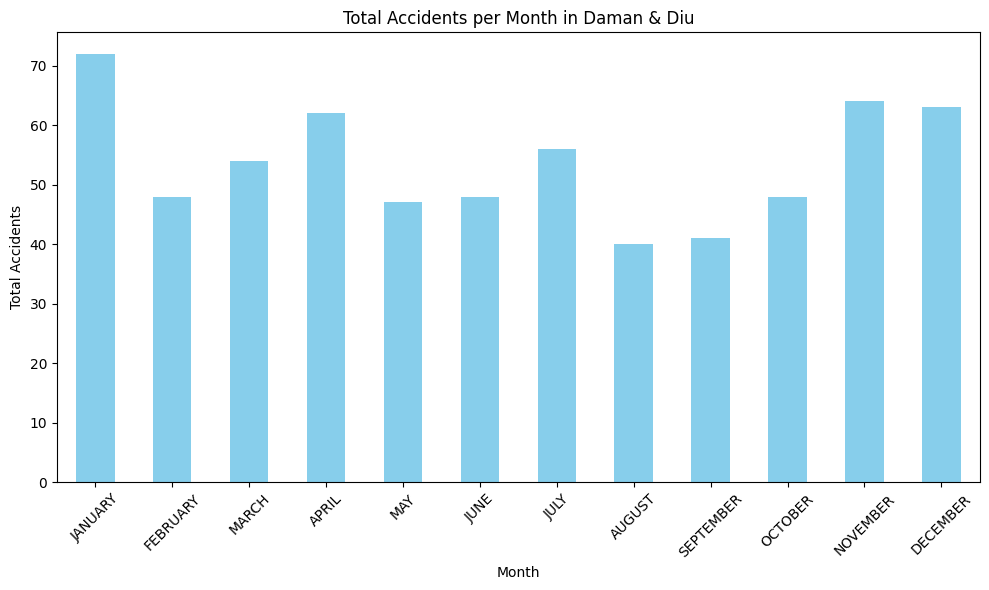

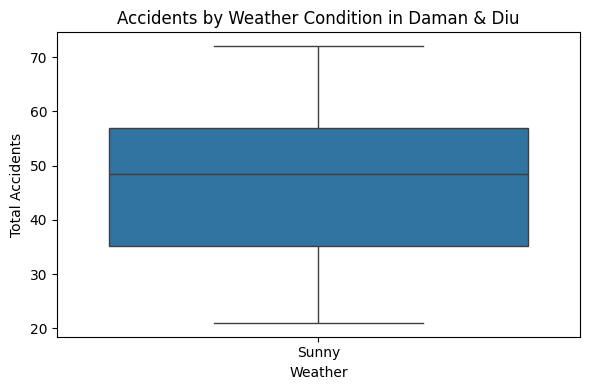


Delhi (Ut): Total Accidents - 110964


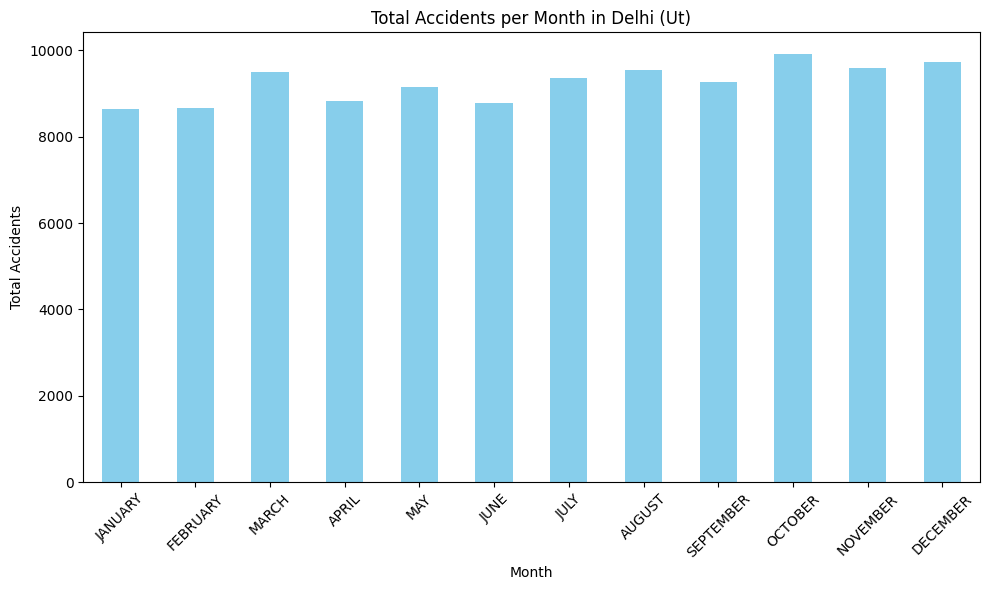

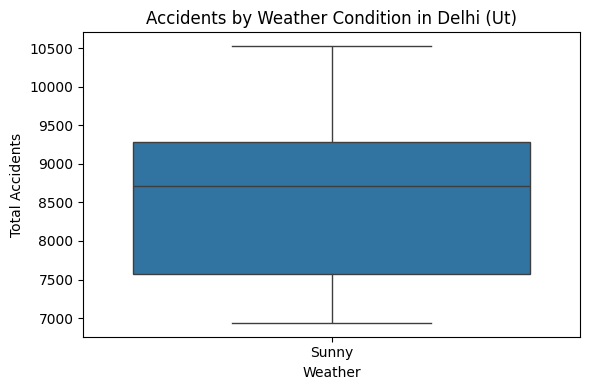


Delhi Ut: Total Accidents - 8310


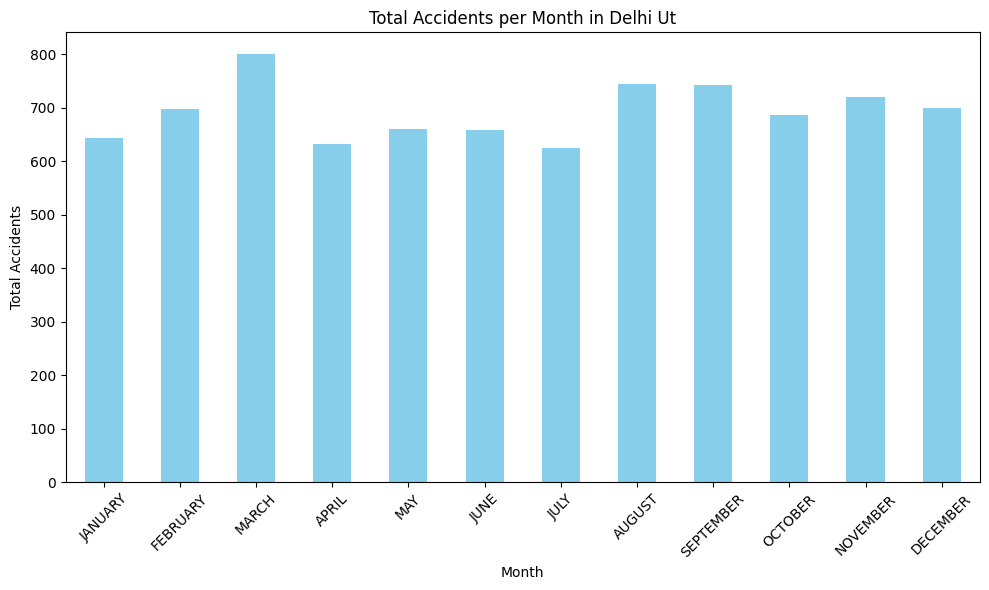

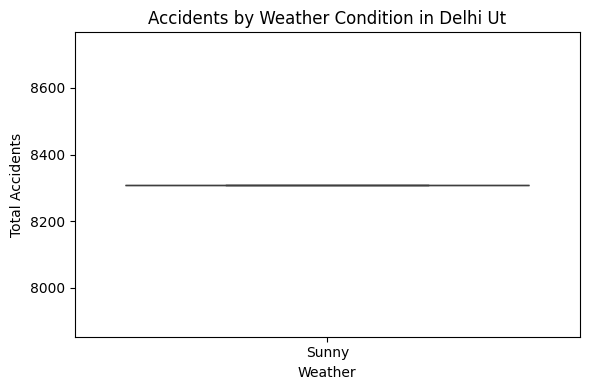


Goa: Total Accidents - 44931


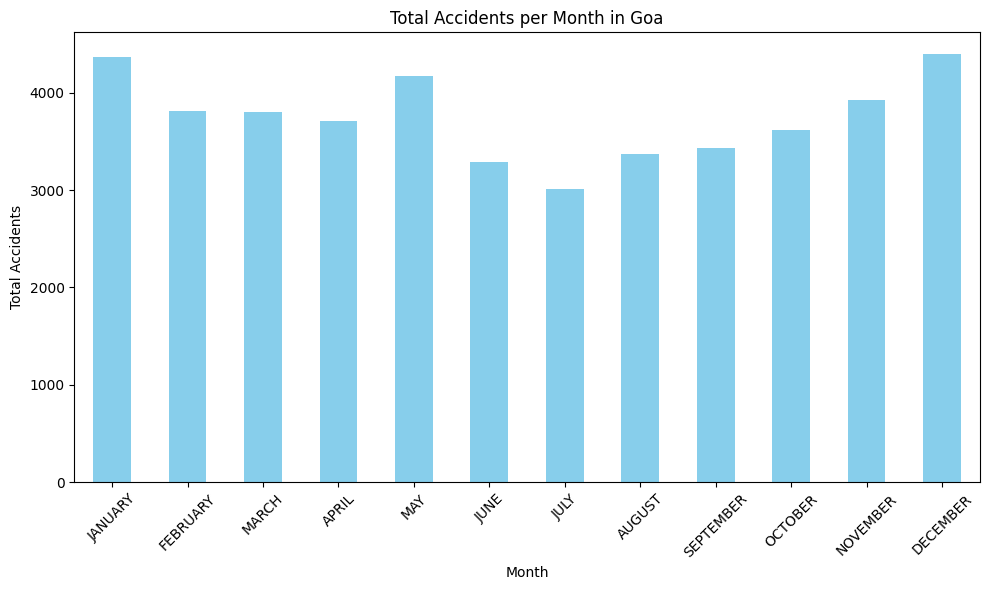

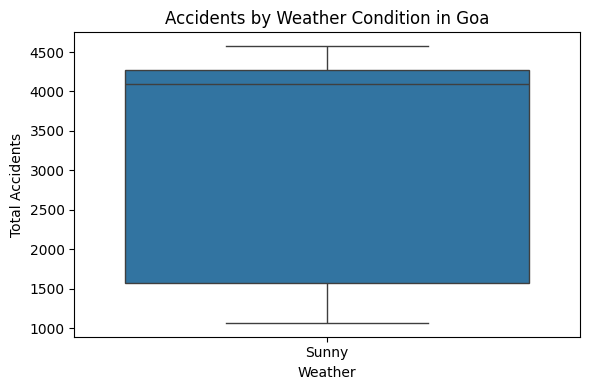


Gujarat: Total Accidents - 300325


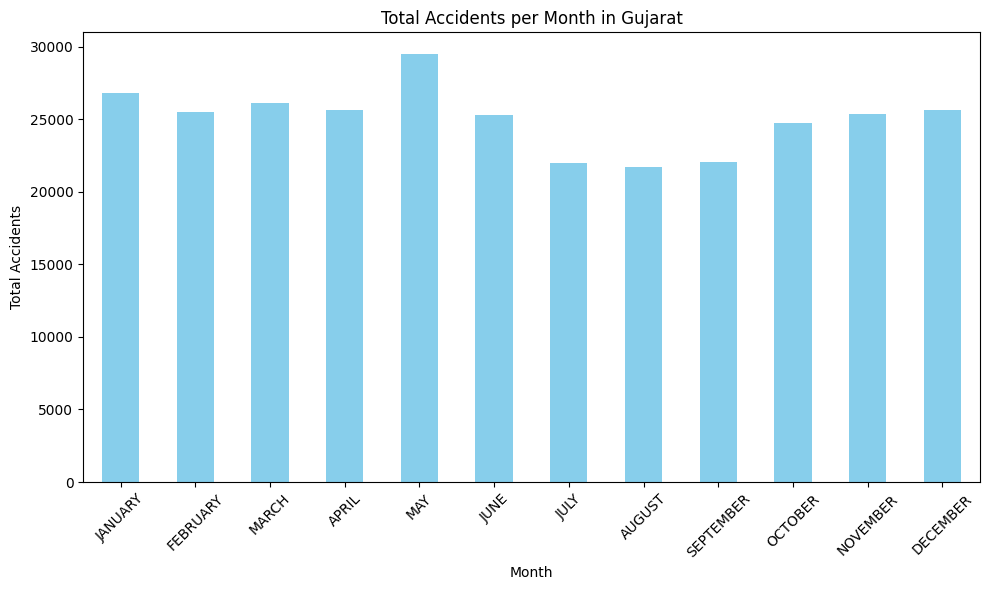

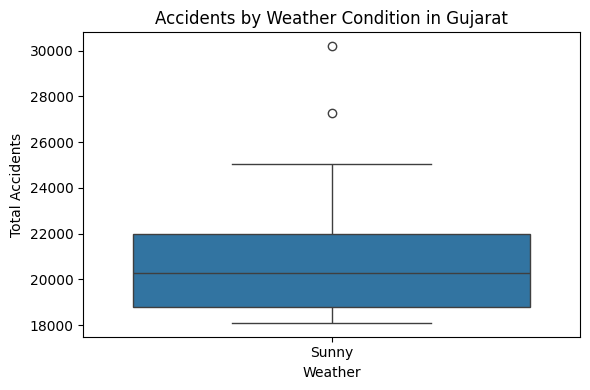


Haryana: Total Accidents - 131921


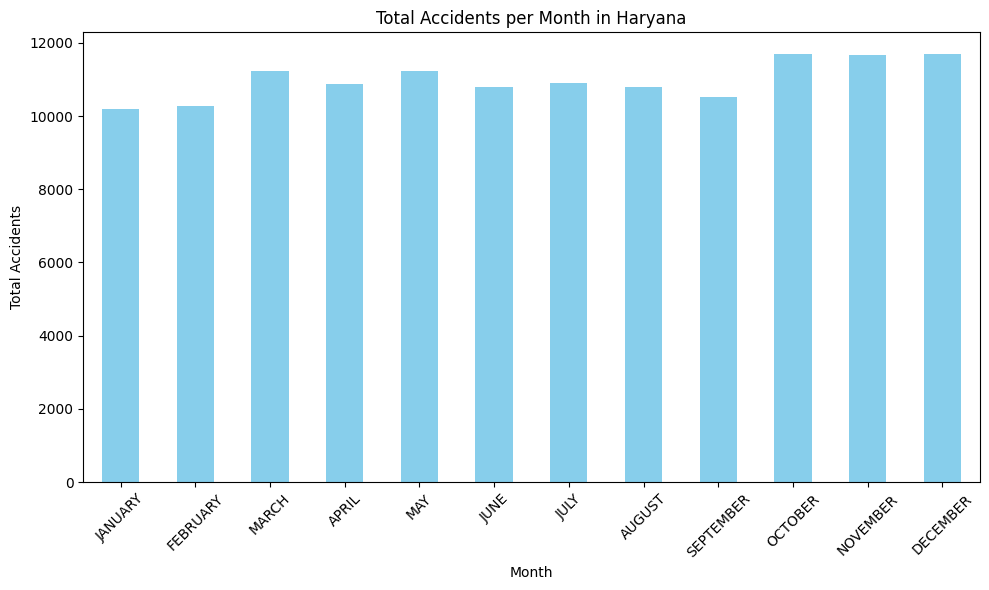

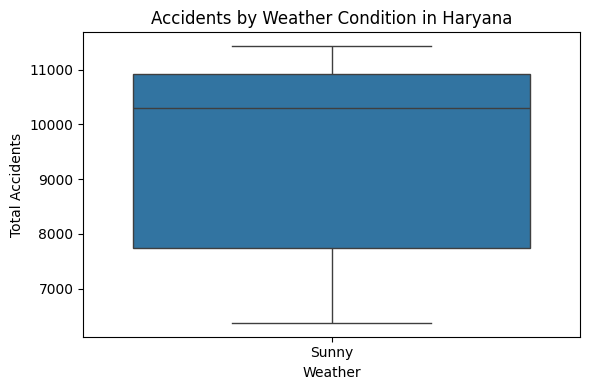


Himachal Pradesh: Total Accidents - 37105


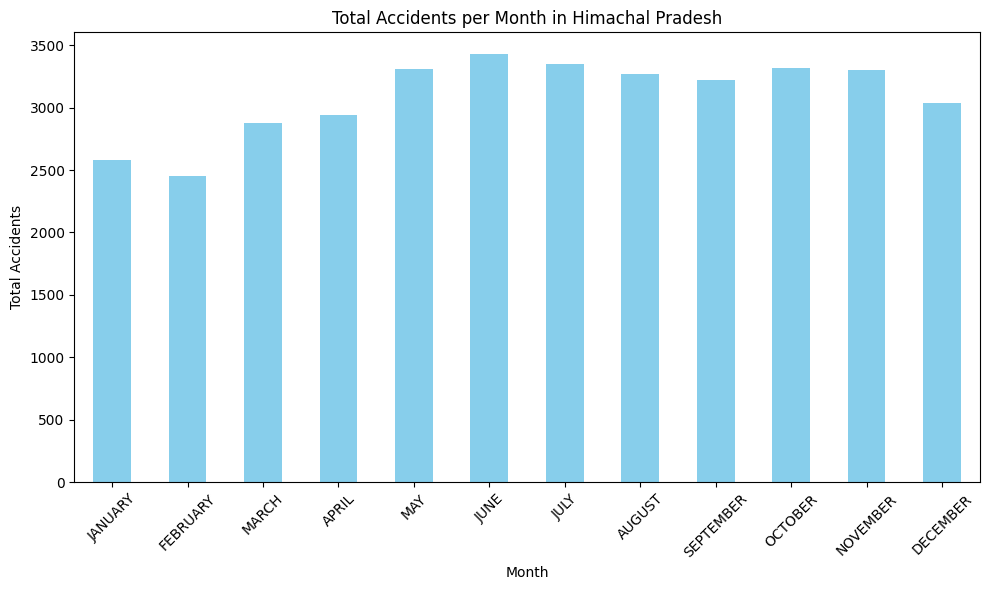

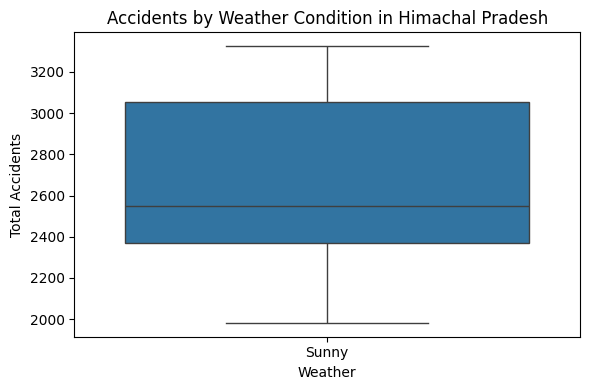


Jammu & Kashmir: Total Accidents - 82820


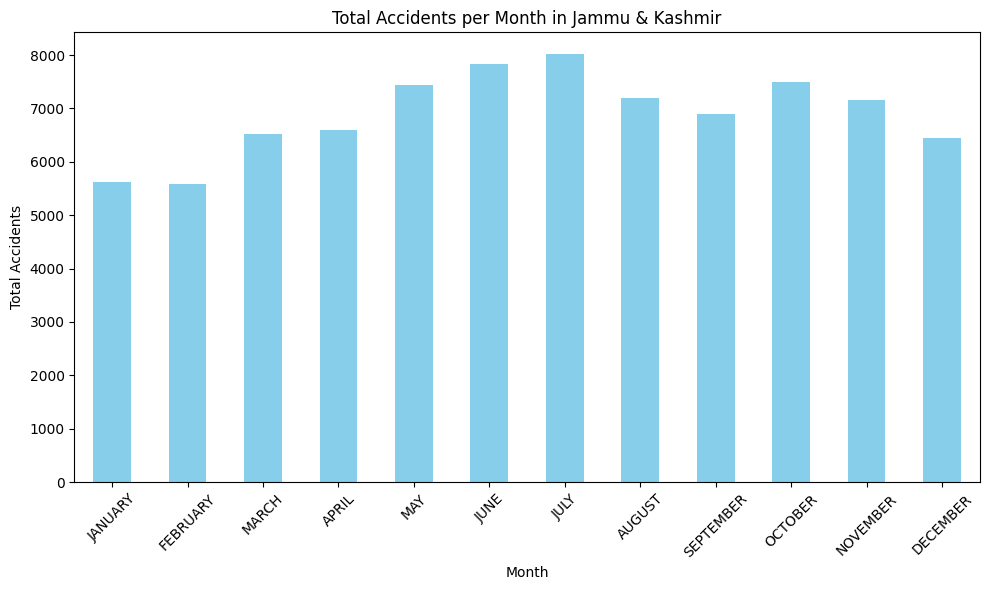

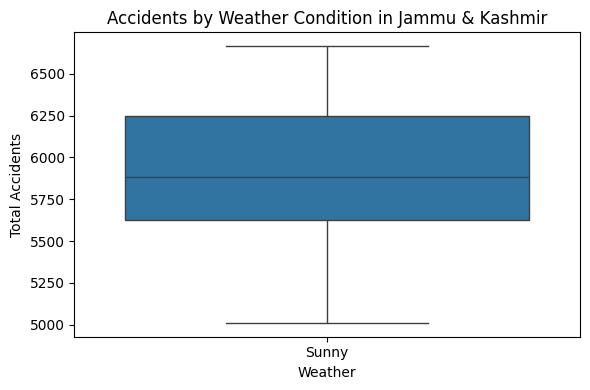


Jharkhand: Total Accidents - 46209


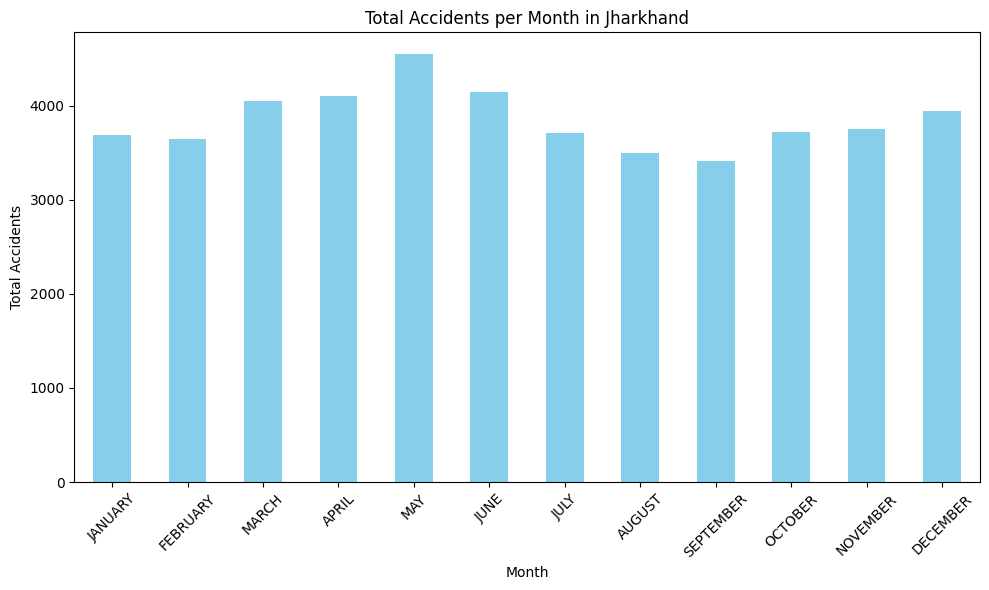

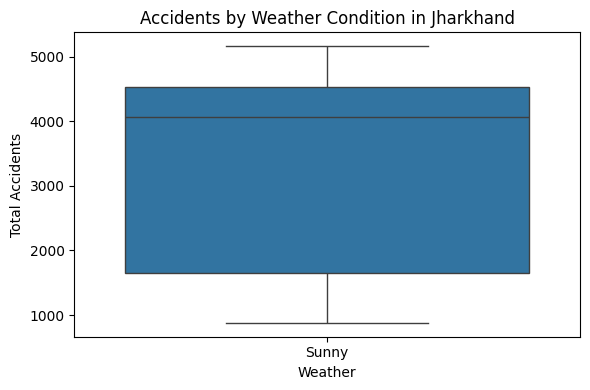


Karnataka: Total Accidents - 584761


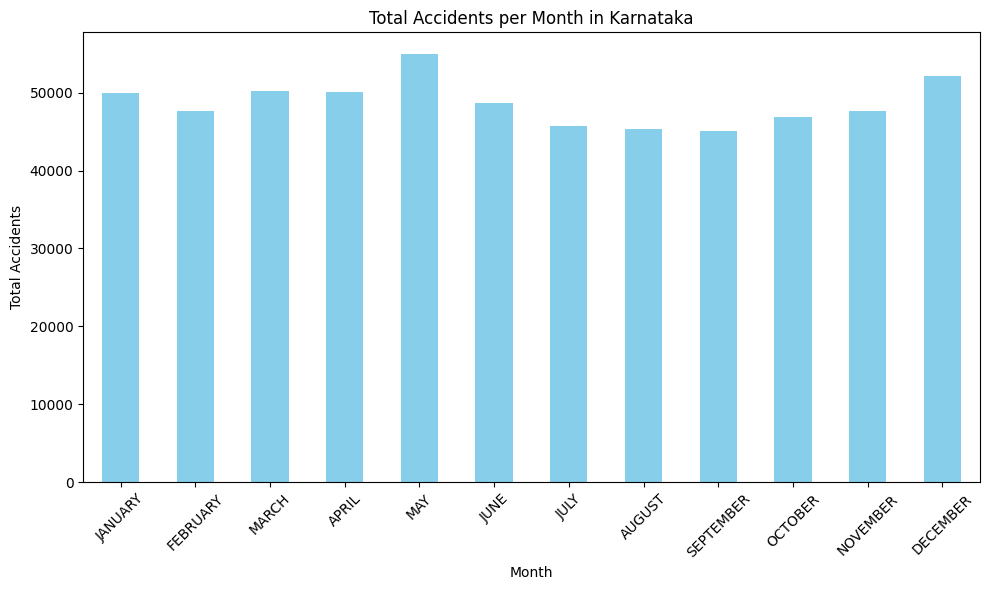

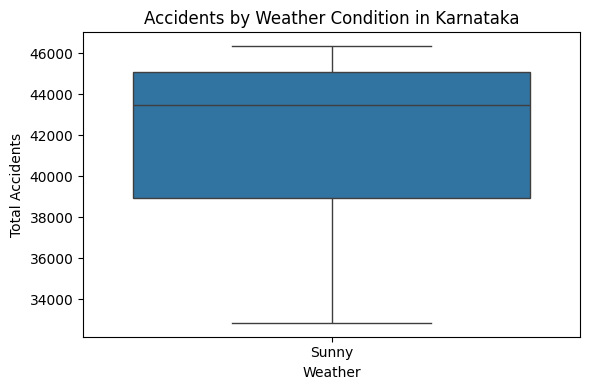


Kerala: Total Accidents - 518161


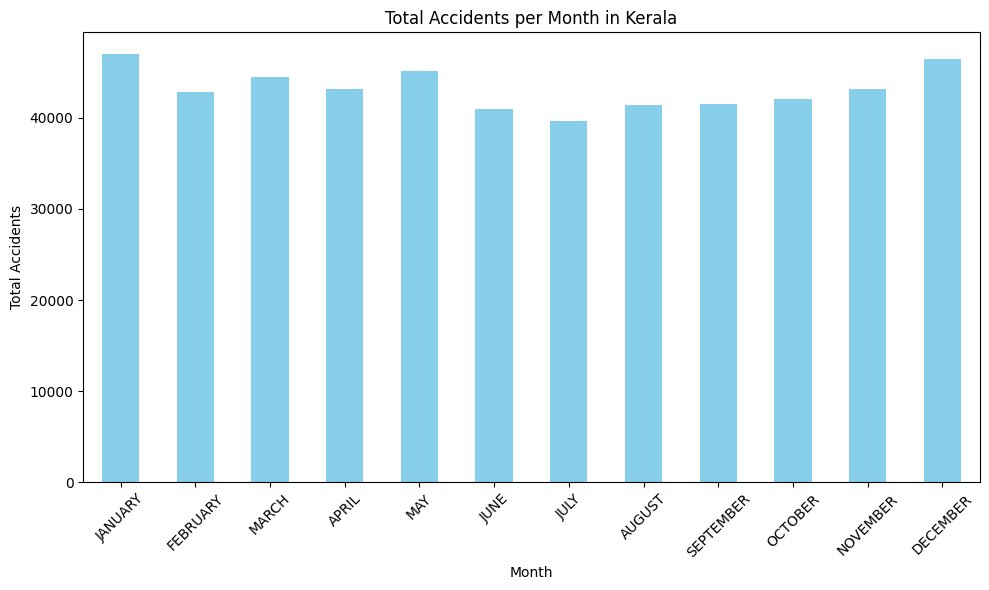

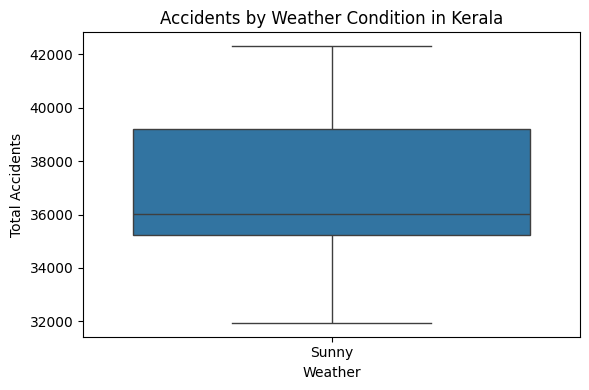


Lakshadweep: Total Accidents - 14


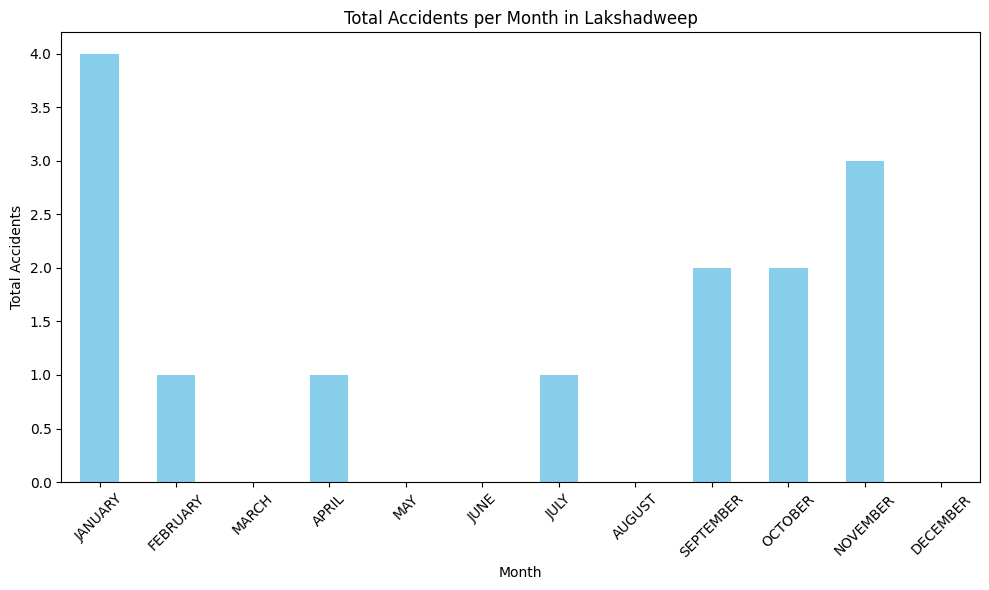

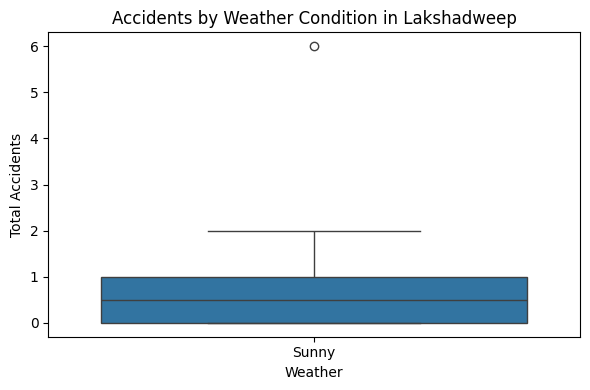


Madhya Pradesh: Total Accidents - 394007


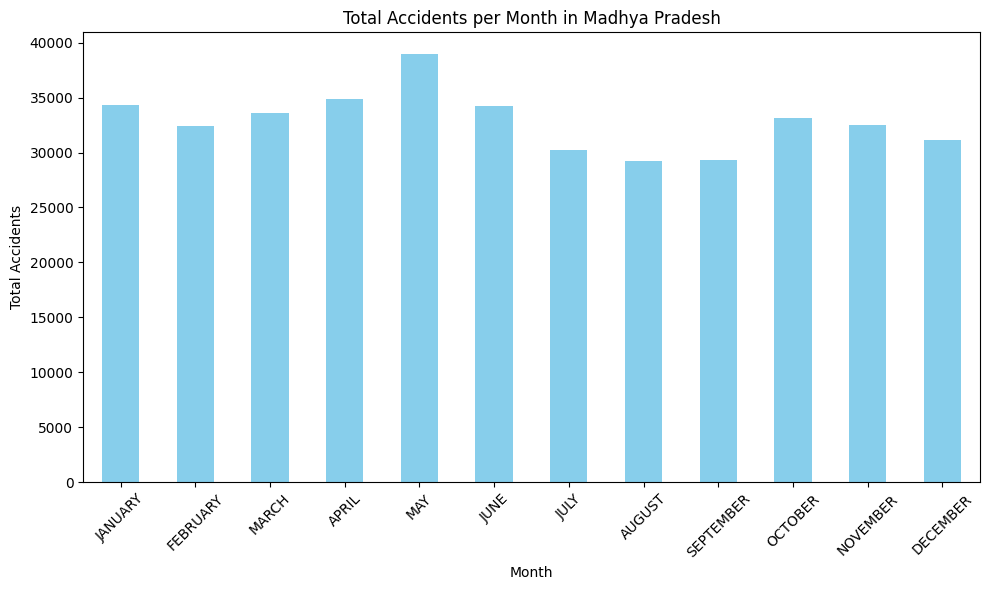

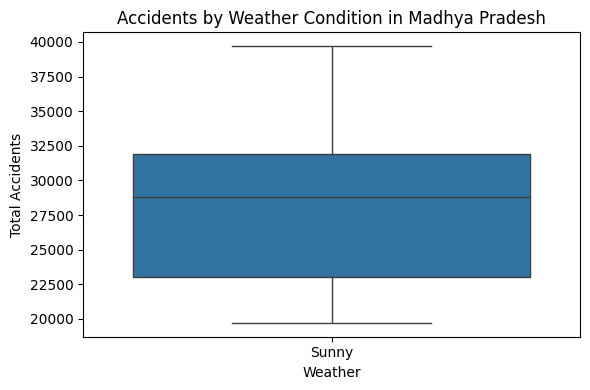


Maharashtra: Total Accidents - 641614


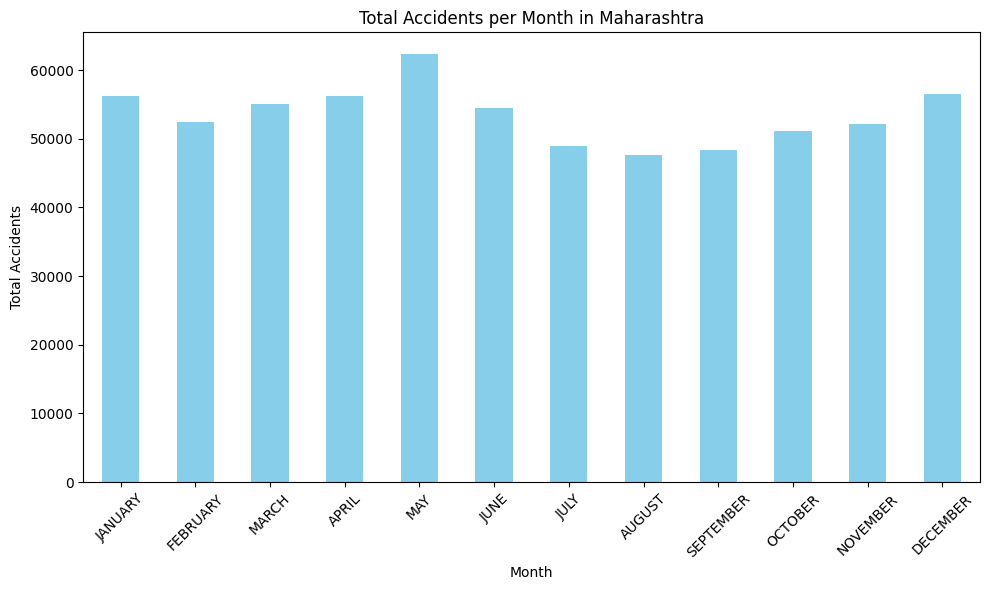

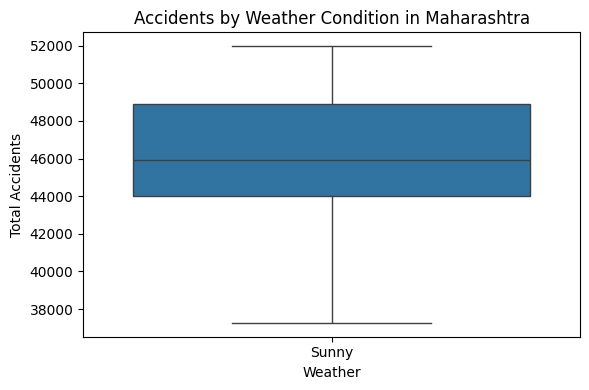


Manipur: Total Accidents - 8130


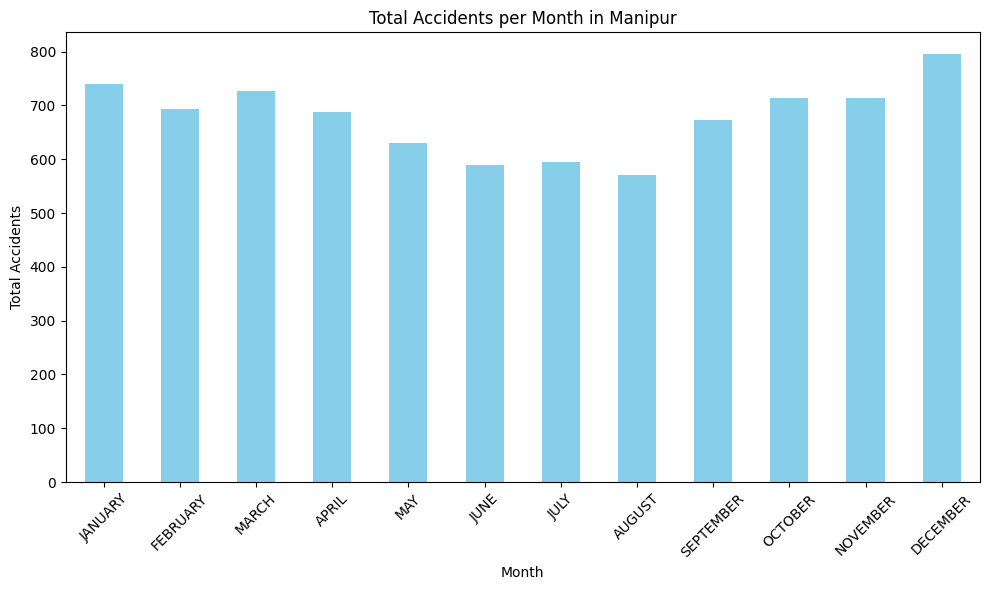

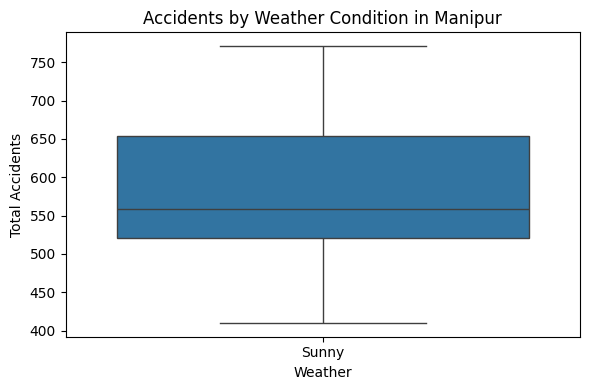


Meghalaya: Total Accidents - 3863


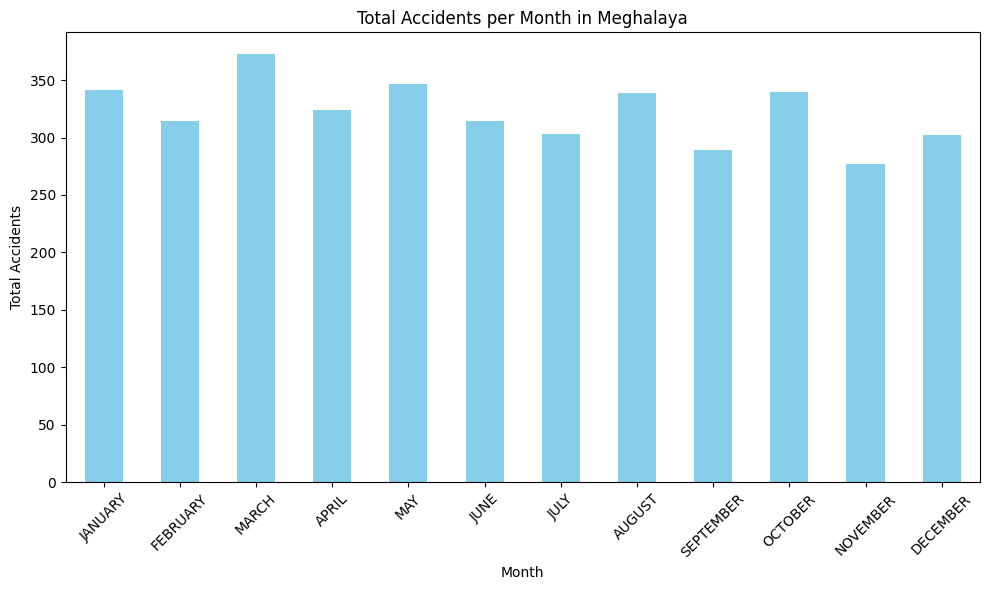

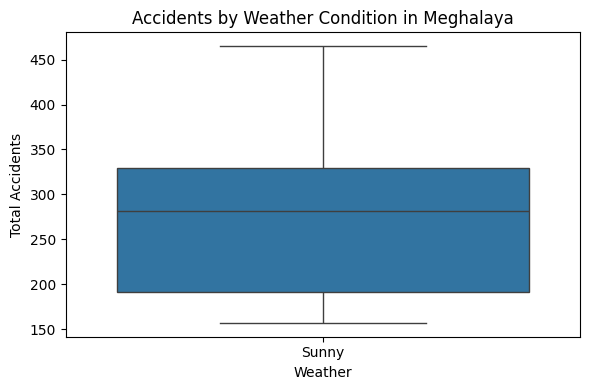


Mizoram: Total Accidents - 1116


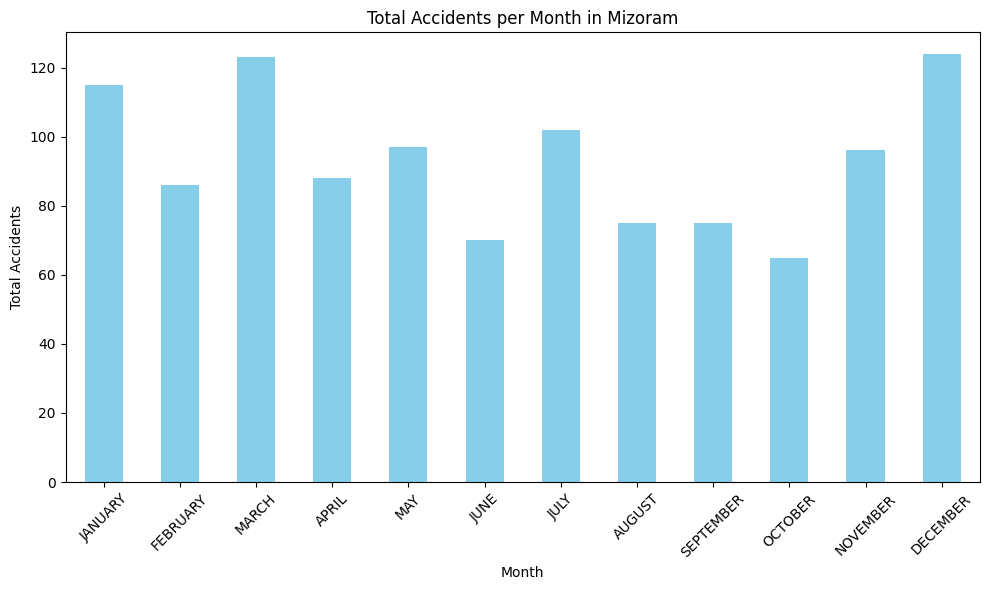

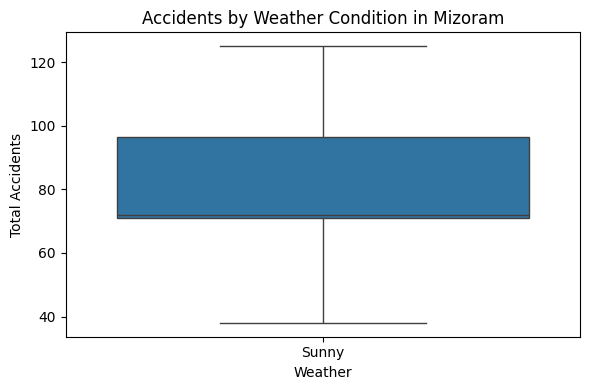


Nagaland: Total Accidents - 781


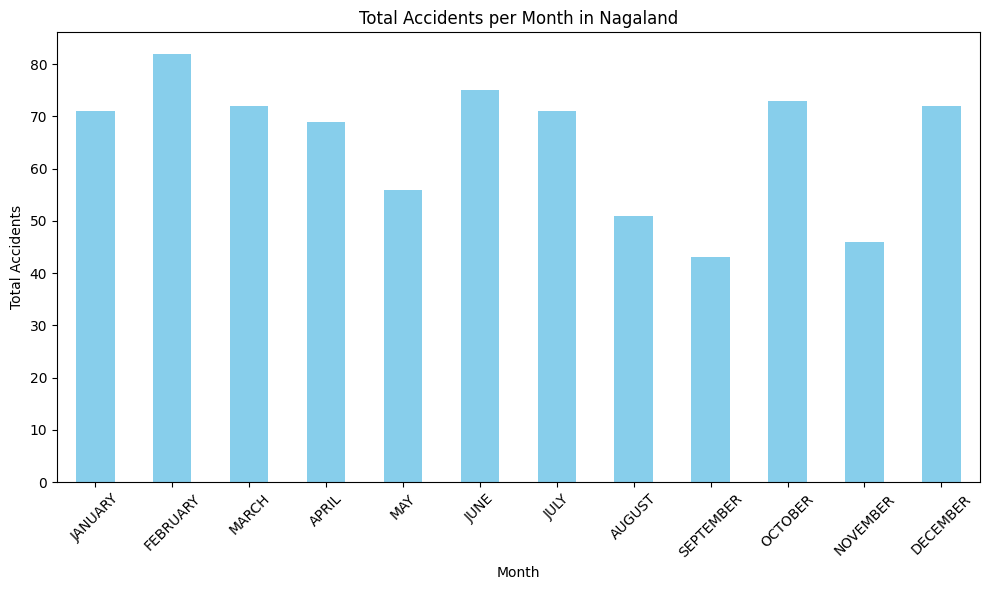

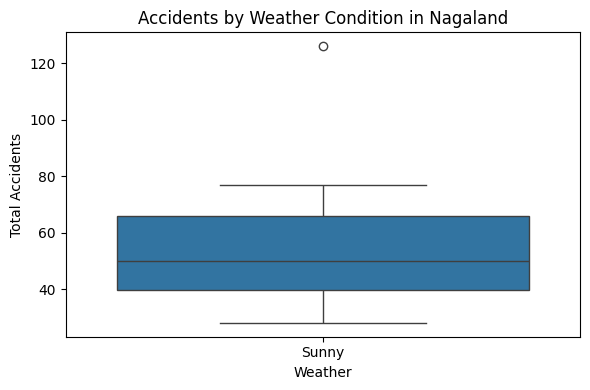


Odisha: Total Accidents - 115237


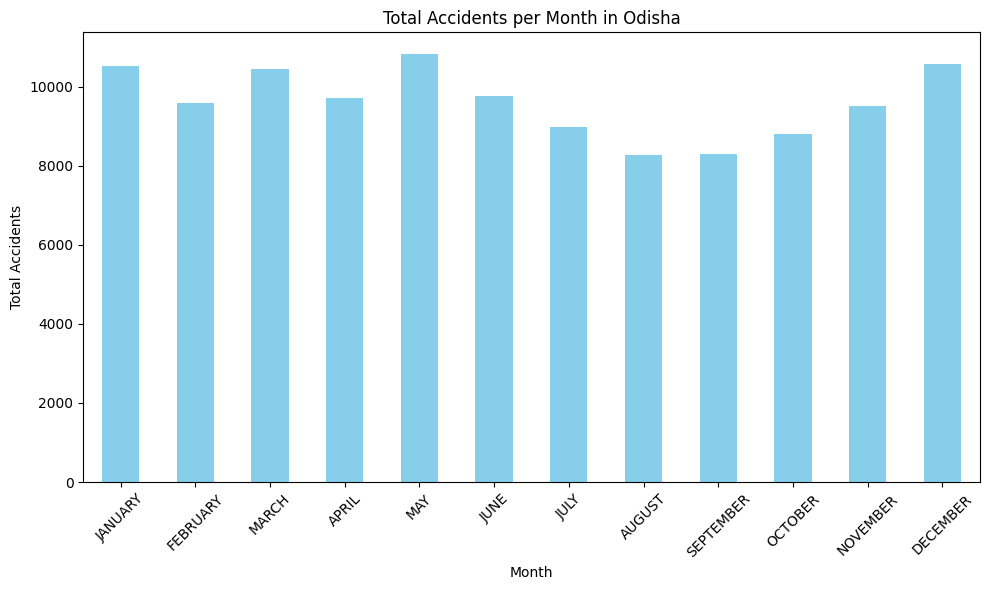

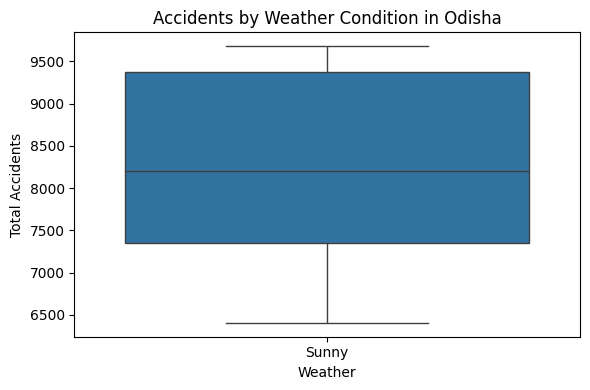


Puducherry: Total Accidents - 21189


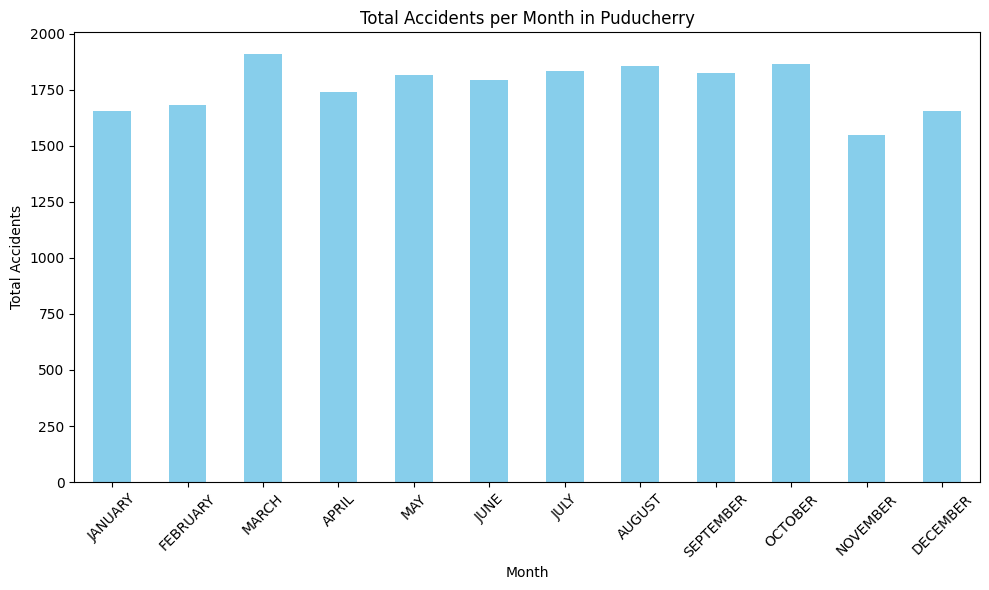

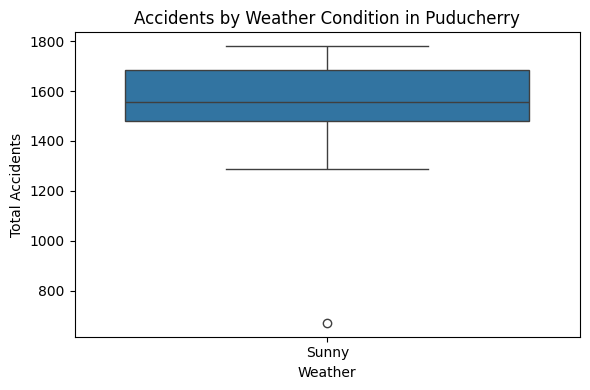


Punjab: Total Accidents - 46804


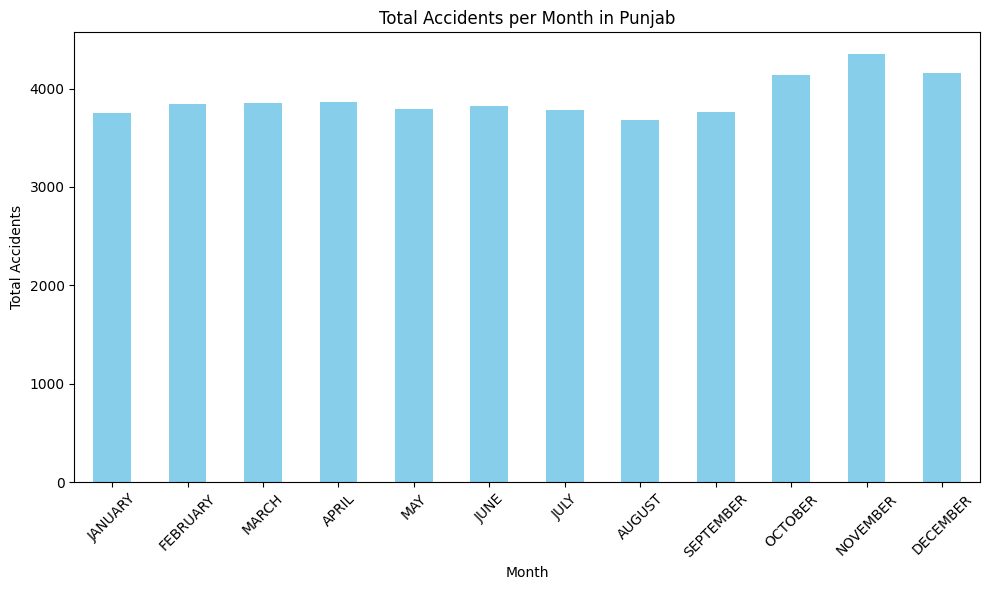

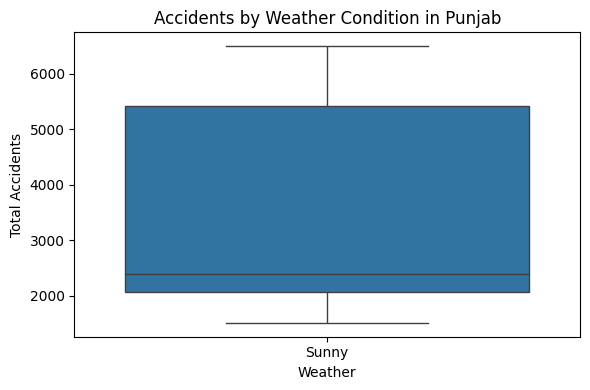


Rajasthan: Total Accidents - 323653


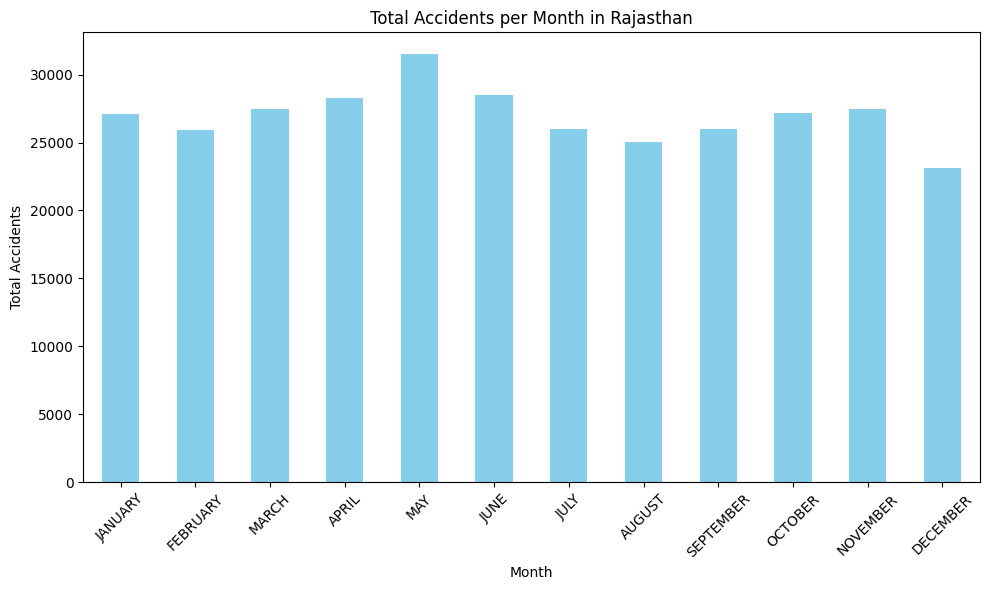

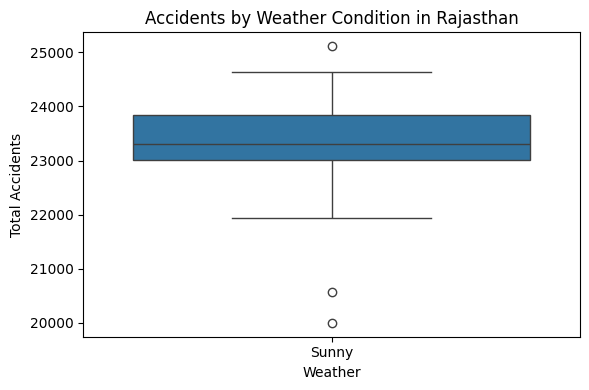


Sikkim: Total Accidents - 2646


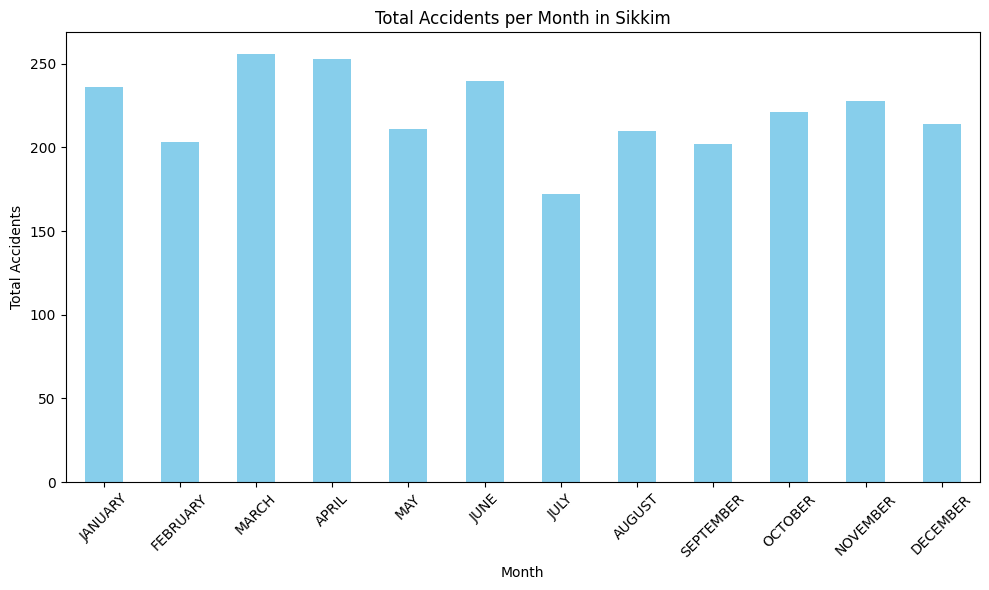

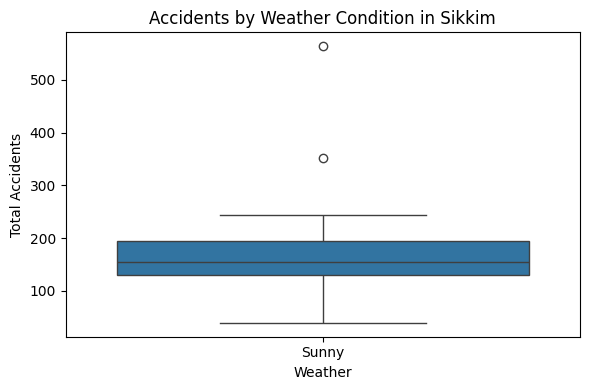


Tamil Nadu: Total Accidents - 852073


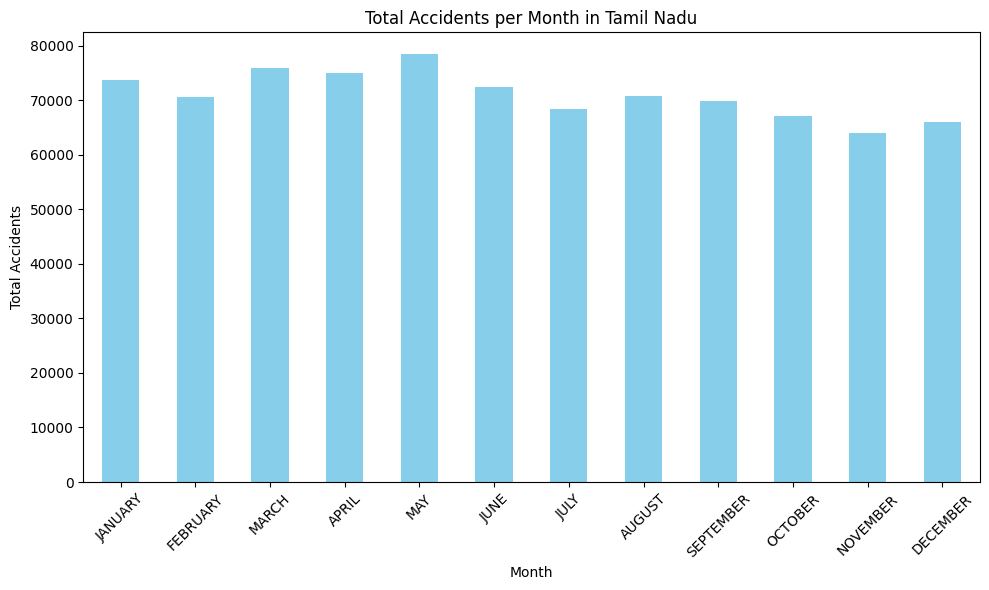

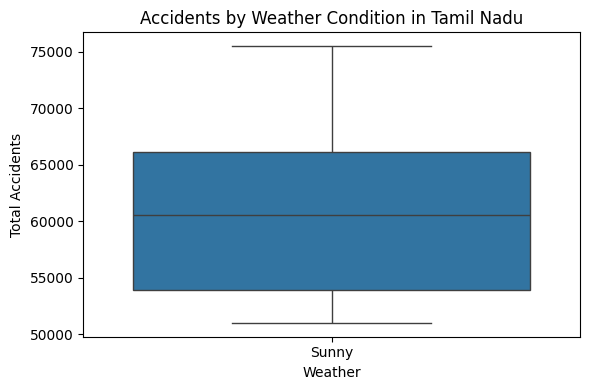


Tripura: Total Accidents - 10534


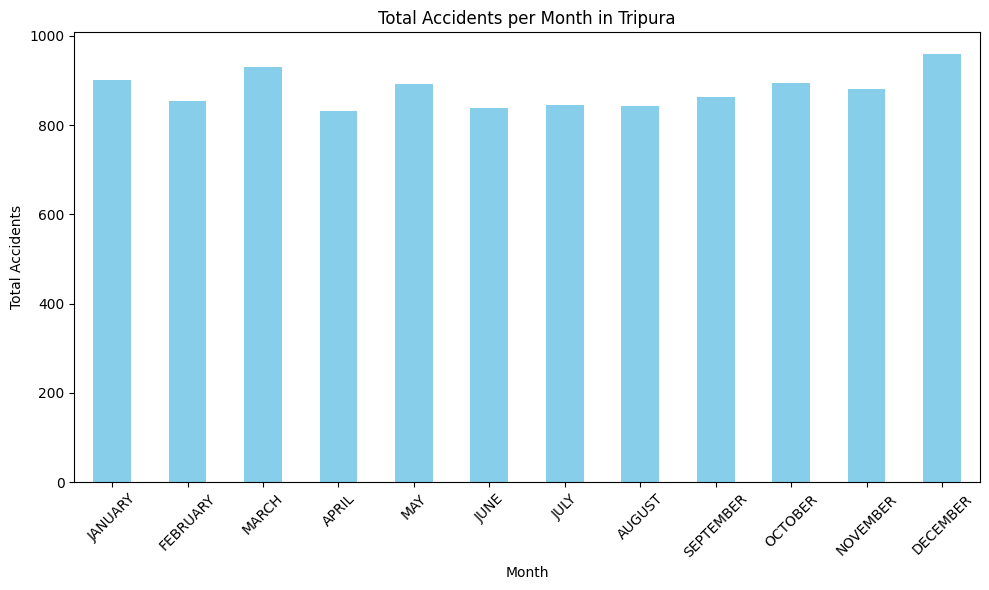

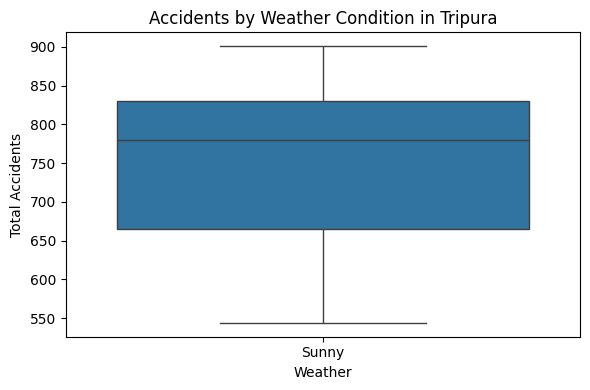


Uttar Pradesh: Total Accidents - 274528


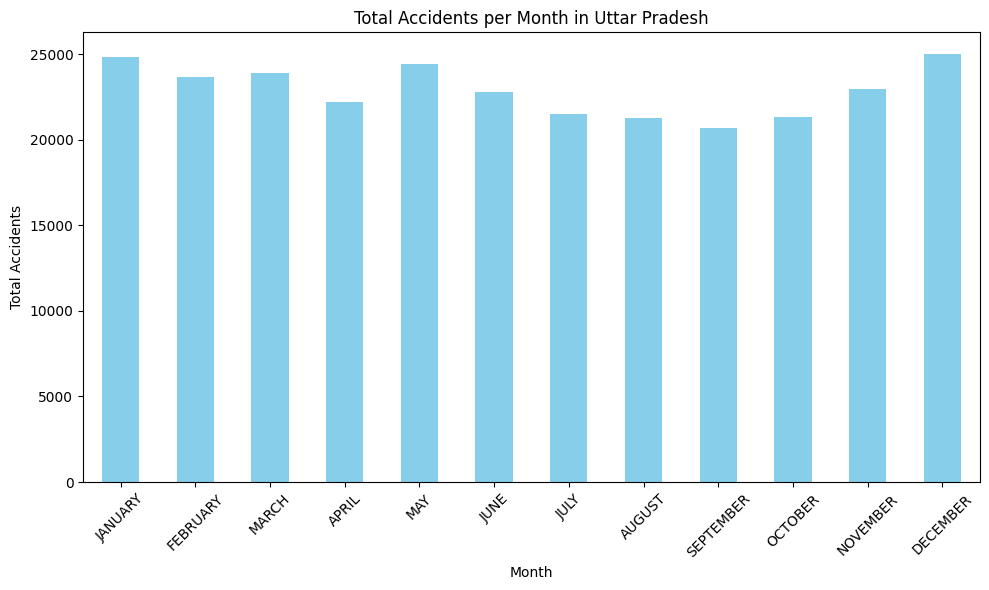

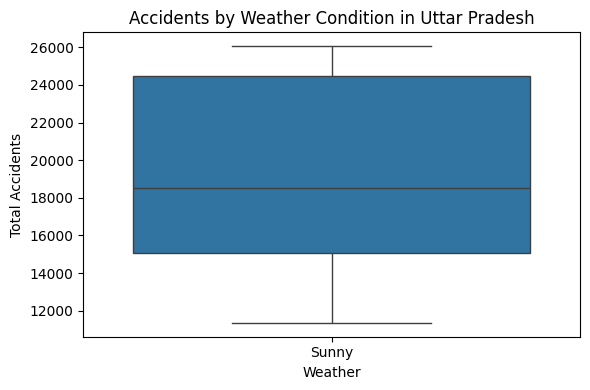


Uttarakhand: Total Accidents - 18192


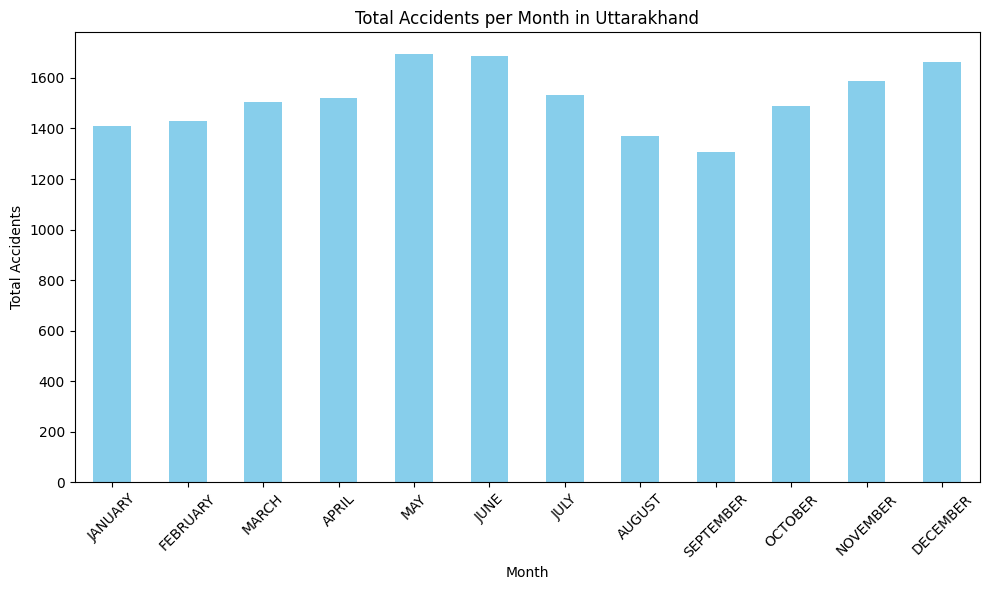

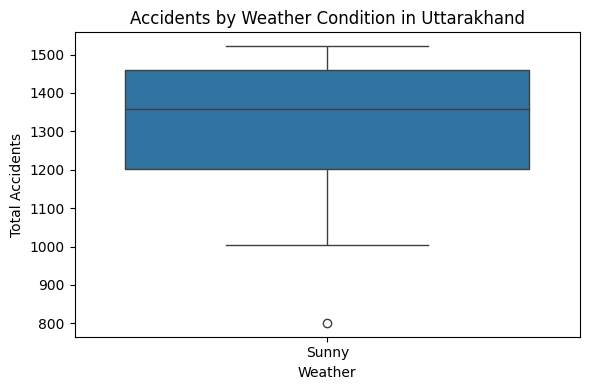


West Bengal: Total Accidents - 189375


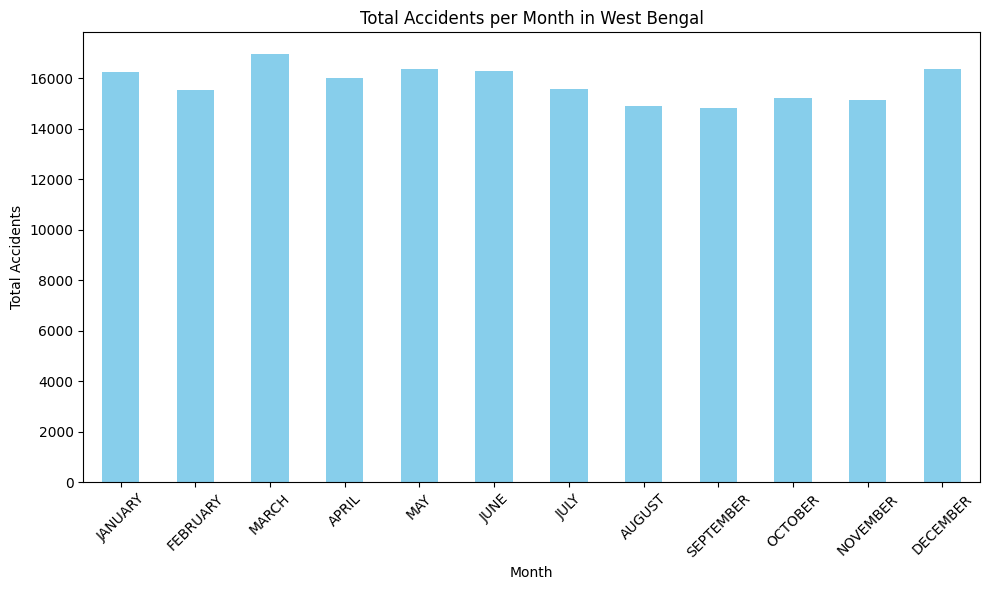

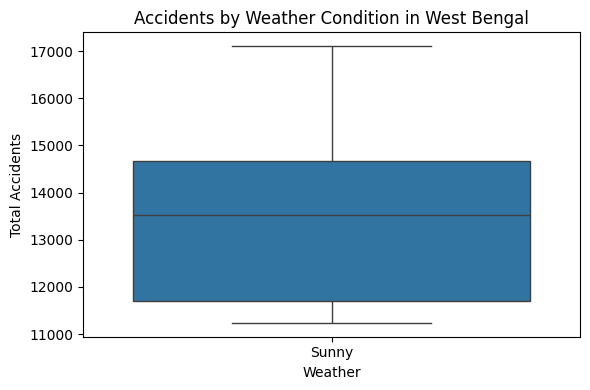

In [28]:
# Calculate monthly and yearly totals
data['MONTHLY_TOTAL'] = data.iloc[:, 2:14].sum(axis=1)
yearly_totals = data.groupby('YEAR')['MONTHLY_TOTAL'].sum()

# Plot yearly totals
plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='bar', color='skyblue')
plt.title('Total Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Loop through each state
for state, state_data in data.groupby('STATE/UT'):
    # Identify hotspots
    state_total = state_data['MONTHLY_TOTAL'].sum()
    print(f"\n{state}: Total Accidents - {state_total}")

    # Plot monthly totals
    monthly_totals = state_data.iloc[:, 2:14].sum()
    plt.figure(figsize=(10, 6))
    monthly_totals.plot(kind='bar', color='skyblue')
    plt.title(f'Total Accidents per Month in {state}')
    plt.xlabel('Month')
    plt.ylabel('Total Accidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Analyze contributing factors (for example, weather)
    # Let's say we have weather data available as well
    weather_data = {
        'STATE/UT': [state],
        'WEATHER': ['Sunny']  # Replace with actual weather data for each state
    }
    weather_df = pd.DataFrame(weather_data)

    # Merge weather data with accident data
    merged_data = pd.merge(state_data, weather_df, on='STATE/UT')

    # Plot accidents by weather
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='WEATHER', y='MONTHLY_TOTAL', data=merged_data)
    plt.title(f'Accidents by Weather Condition in {state}')
    plt.xlabel('Weather')
    plt.ylabel('Total Accidents')
    plt.tight_layout()
    plt.show()



In [29]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# Generate random latitude and longitude values
np.random.seed(0)  # for reproducibility
latitude_data = np.random.uniform(low=8, high=37, size=490)  # Generating 490 random latitude values
longitude_data = np.random.uniform(low=68, high=98, size=490)  # Generating 490 random longitude values

# Create a map centered at a specific location
mymap = folium.Map(location=[20, 80], zoom_start=5)  # Adjust the location and zoom level as needed

# Create a MarkerCluster for better visualization of multiple markers
marker_cluster = MarkerCluster().add_to(mymap)

# Loop through each accident and add a marker to the map
for lat, lon in zip(latitude_data, longitude_data):
    folium.Marker([lat, lon], popup="Accident").add_to(marker_cluster)

# Save the map to an HTML file
mymap.save('accident_hotspots.html')
